In [8]:
from keras.applications import VGG16
from keras import layers
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras import optimizers
from keras.callbacks import ModelCheckpoint
import scipy.io
import numpy as np
import os
import random
%matplotlib inline
import matplotlib.pyplot as plt
import glob
import json
import tensorflow as tf

Using TensorFlow backend.


In [3]:
img = Input(shape=(448,448,3))
vgg_model = VGG16(input_tensor=img,  weights='imagenet', include_top=False)

In [5]:
vgg_out = vgg_model.layers[-2]

In [5]:
import json
genere_list = [json.loads(line) for line in open('./start/bba/genre_list.json')][0]

In [6]:
genere_list['']

{u'798': {u'level': u'4', u'name': u'\u82f1\u4f26TX4', u'type': u'1'},
 u'344': {u'level': u'3', u'name': u'MX-5', u'type': u'4'},
 u'346': {u'level': u'3', u'name': u'RX-8', u'type': u'4'},
 u'347': {u'level': u'3', u'name': u'G3', u'type': u'1'},
 u'341': {u'level': u'4', u'name': u'CX-7', u'type': u'2'},
 u'342': {u'level': u'-1', u'name': u'F6', u'type': u'-1'},
 u'343': {u'level': u'4', u'name': u'\u6bd5\u52a0\u7d22', u'type': u'3'},
 u'348': {u'level': u'5', u'name': u'C6', u'type': u'1'},
 u'349': {u'level': u'1', u'name': u'F0', u'type': u'1'},
 u'298': {u'level': u'4', u'name': u'ATS', u'type': u'1'},
 u'299': {u'level': u'4', u'name': u'T600', u'type': u'2'},
 u'296': {u'level': u'2', u'name': u'C20R', u'type': u'1'},
 u'297': {u'level': u'2', u'name': u'Z200', u'type': u'1'},
 u'294': {u'level': u'6', u'name': u'M300', u'type': u'3'},
 u'295': {u'level': u'2', u'name': u'M2', u'type': u'2'},
 u'292': {u'level': u'2', u'name': u'\u70ab\u4e3d', u'type': u'1'},
 u'293': {u'leve

In [5]:
import numpy as np
from collections import defaultdict
with open('./start/bba/bb.npy') as f:
    bb_list = np.load(f)
bb_list = bb_list.item()
result = defaultdict(list)
## delete left > 0.5 right border < 0.5
## 1: top height 2: left width 3 height 4 width
for k in bb_list.keys():
    if len(bb_list[k]) == 1:
        result[k] = bb_list[k]
        continue
    for bb_box in bb_list[k]:
        if bb_box[1] < 0.55 and bb_box[3] > 0.5:
            result[k].append(bb_box)

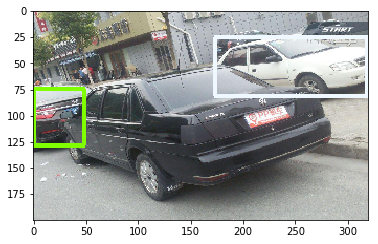

In [20]:
from matplotlib import pyplot as plt
%matplotlib inline

image_path = './start/'
for k in ['1/50/441568_b.jpg']:
    if len(result[k]):
        image = Image.open(image_path+k)
        image = image.resize((320,200))
        draw_bounding_boxes_on_image(image, np.array(bb_list[k]))
        plt.imshow(image)

In [9]:
import PIL.Image as Image
import PIL.ImageColor as ImageColor
import PIL.ImageDraw as ImageDraw
import PIL.ImageFont as ImageFont

STANDARD_COLORS = [
    'AliceBlue', 'Chartreuse',  'Azure', 'Beige', 'Bisque',
    'BlanchedAlmond', 'BlueViolet', 'BurlyWood', 'CadetBlue', 'AntiqueWhite',
    'Chocolate', 'Coral', 'CornflowerBlue', 'Cornsilk', 'Crimson', 'Cyan',
    'DarkCyan', 'DarkGoldenRod', 'DarkGrey', 'DarkKhaki', 'DarkOrange',
    'DarkOrchid', 'DarkSalmon', 'DarkSeaGreen', 'DarkTurquoise', 'DarkViolet',
    'DeepPink', 'DeepSkyBlue', 'DodgerBlue', 'FireBrick', 'FloralWhite',
    'ForestGreen', 'Fuchsia', 'Gainsboro', 'GhostWhite', 'Gold', 'GoldenRod',
    'Salmon', 'Tan', 'HoneyDew', 'HotPink', 'IndianRed', 'Ivory', 'Khaki',
    'Lavender', 'LavenderBlush', 'LawnGreen', 'LemonChiffon', 'LightBlue',
    'LightCoral', 'LightCyan', 'LightGoldenRodYellow', 'LightGray', 'LightGrey',
    'LightGreen', 'LightPink', 'LightSalmon', 'LightSeaGreen', 'LightSkyBlue',
    'LightSlateGray', 'LightSlateGrey', 'LightSteelBlue', 'LightYellow', 'Lime',
    'LimeGreen', 'Linen', 'Magenta', 'MediumAquaMarine', 'MediumOrchid',
    'MediumPurple', 'MediumSeaGreen', 'MediumSlateBlue', 'MediumSpringGreen',
    'MediumTurquoise', 'MediumVioletRed', 'MintCream', 'MistyRose', 'Moccasin',
    'NavajoWhite', 'OldLace', 'Olive', 'OliveDrab', 'Orange', 'OrangeRed',
    'Orchid', 'PaleGoldenRod', 'PaleGreen', 'PaleTurquoise', 'PaleVioletRed',
    'PapayaWhip', 'PeachPuff', 'Peru', 'Pink', 'Plum', 'PowderBlue', 'Purple',
    'Red', 'RosyBrown', 'RoyalBlue', 'SaddleBrown', 'Green', 'SandyBrown',
    'SeaGreen', 'SeaShell', 'Sienna', 'Silver', 'SkyBlue', 'SlateBlue',
    'SlateGray', 'SlateGrey', 'Snow', 'SpringGreen', 'SteelBlue', 'GreenYellow',
    'Teal', 'Thistle', 'Tomato', 'Turquoise', 'Violet', 'Wheat', 'White',
    'WhiteSmoke', 'Yellow', 'YellowGreen'
]

def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color='red',
                               thickness=4,
                               display_str_list=(),
                               use_normalized_coordinates=True):
    """Adds a bounding box to an image.
      Each string in display_str_list is displayed on a separate line above the
      bounding box in black text on a rectangle filled with the input 'color'.
      Args:
        image: a PIL.Image object.
        ymin: ymin of bounding box.
        xmin: xmin of bounding box.
        ymax: ymax of bounding box.
        xmax: xmax of bounding box.
        color: color to draw bounding box. Default is red.
        thickness: line thickness. Default value is 4.
        display_str_list: list of strings to display in box
                          (each to be shown on its own line).
        use_normalized_coordinates: If True (default), treat coordinates
          ymin, xmin, ymax, xmax as relative to the image.  Otherwise treat
          coordinates as absolute.
      """
    draw = ImageDraw.Draw(image)
    im_width, im_height = image.size
    if use_normalized_coordinates:
        (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                  ymin * im_height, ymax * im_height)
    else:
        (left, right, top, bottom) = (xmin, xmax, ymin, ymax)
        
    draw.line([(left, top), (left, bottom), (right, bottom),
                    (right, top), (left, top)], width=thickness, fill=color)
    try:
        font = ImageFont.truetype('arial.ttf', 24)
    except IOError:
        font = ImageFont.load_default()
    #text_bottom = top
    # Reverse list and print from bottom to top.
    """
    for display_str in display_str_list[::-1]:
        text_width, text_height = font.getsize(display_str)
        margin = np.ceil(0.05 * text_height)
        draw.rectangle(
                        [(left, text_bottom - text_height - 2 * margin), (left + text_width,
                                                          text_bottom)],
            fill=color)
        draw.text(
            (left + margin, text_bottom - text_height - margin),
            display_str,
            fill='black',
            font=font)
        text_bottom -= text_height - 2 * margin
    """
def draw_bounding_boxes_on_image(image,
                                 boxes,
                                 color='red',
                                 thickness=4,
                                 display_str_list_list=()):
    """Draws bounding boxes on image.
  Args:
    image: a PIL.Image object.
    boxes: a 2 dimensional numpy array of [N, 4]: (ymin, xmin, ymax, xmax).
           The coordinates are in normalized format between [0, 1].
    color: color to draw bounding box. Default is red.
    thickness: line thickness. Default value is 4.
    display_str_list_list: list of list of strings.
                           a list of strings for each bounding box.
                           The reason to pass a list of strings for a
                           bounding box is that it might contain
                           multiple labels.
  Raises:
    ValueError: if boxes is not a [N, 4] array
    """
    boxes_shape = boxes.shape
    if not boxes_shape:
        return
    if len(boxes_shape) != 2 or boxes_shape[1] != 4:
        raise ValueError('Input must be of size [N, 4]')
    for i in range(boxes_shape[0]):
        draw_bounding_box_on_image(image, boxes[i, 0], boxes[i, 1], boxes[i, 2],
                               boxes[i, 3])

In [ ]:
for 